In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ticker_code = "IBM"

df = yf.download(ticker_code, start='2025-01-01', end='2025-06-13', group_by='ticker')
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100
2025-01-06,220.059766,221.391973,217.839432,219.734116,2846700
2025-01-07,220.405183,223.720883,219.892035,221.007141,3299300
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800


In [2]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')

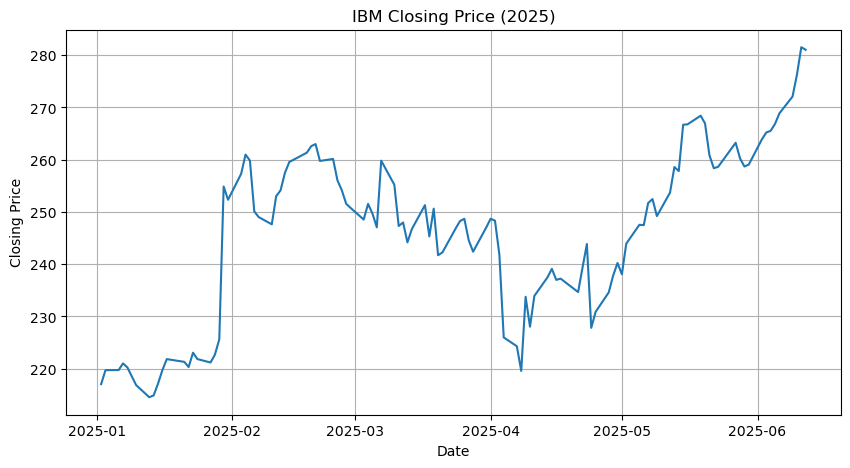

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{ticker_code} Closing Price (2025)')
plt.grid(True)
plt.show()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
additve = seasonal_decompose(df['Close'] , model = 'additive' , period = 30)

In [5]:
trend = additve.trend
seasonal = additve.seasonal
residual = additve.resid

(array([20120., 20134., 20148., 20162., 20179., 20193., 20209., 20223.]),
 [Text(20120.0, 0, '2025-02-01'),
  Text(20134.0, 0, '2025-02-15'),
  Text(20148.0, 0, '2025-03-01'),
  Text(20162.0, 0, '2025-03-15'),
  Text(20179.0, 0, '2025-04-01'),
  Text(20193.0, 0, '2025-04-15'),
  Text(20209.0, 0, '2025-05-01'),
  Text(20223.0, 0, '2025-05-15')])

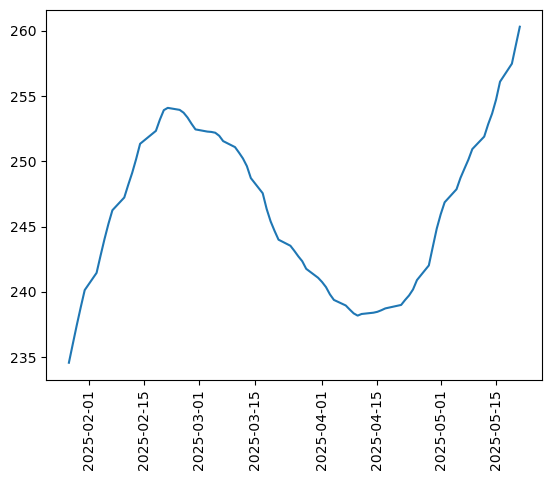

In [6]:
plt.plot(df.index , trend)
plt.xticks(rotation = 90)

(array([20089., 20120., 20148., 20179., 20209., 20240.]),
 [Text(20089.0, 0, '2025-01'),
  Text(20120.0, 0, '2025-02'),
  Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04'),
  Text(20209.0, 0, '2025-05'),
  Text(20240.0, 0, '2025-06')])

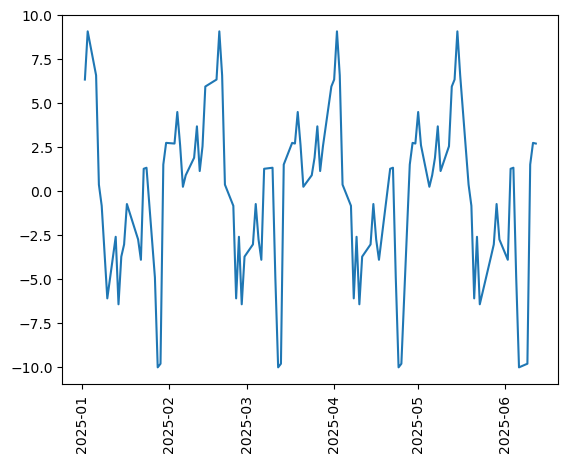

In [7]:
plt.plot(df.index , seasonal)
plt.xticks(rotation = 90)

(array([20120., 20134., 20148., 20162., 20179., 20193., 20209., 20223.]),
 [Text(20120.0, 0, '2025-02-01'),
  Text(20134.0, 0, '2025-02-15'),
  Text(20148.0, 0, '2025-03-01'),
  Text(20162.0, 0, '2025-03-15'),
  Text(20179.0, 0, '2025-04-01'),
  Text(20193.0, 0, '2025-04-15'),
  Text(20209.0, 0, '2025-05-01'),
  Text(20223.0, 0, '2025-05-15')])

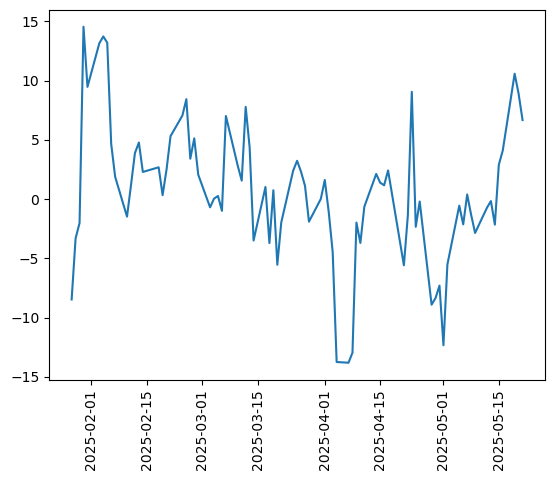

In [8]:
plt.plot(df.index , residual)
plt.xticks(rotation = 90)

In [9]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['Close'] , period = 30)
res = stl.fit()

In [10]:
trend = res.trend
seasonality = res.seasonal
residual = res.resid

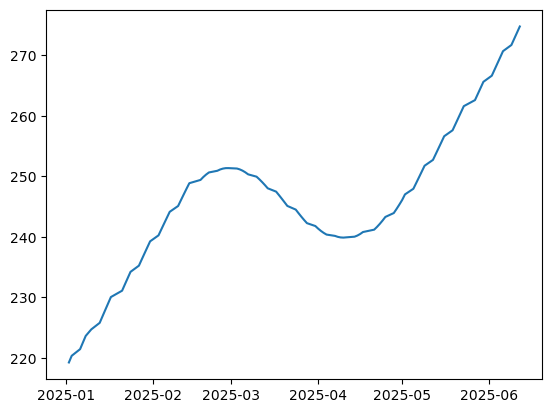

In [11]:
plt.plot(trend)

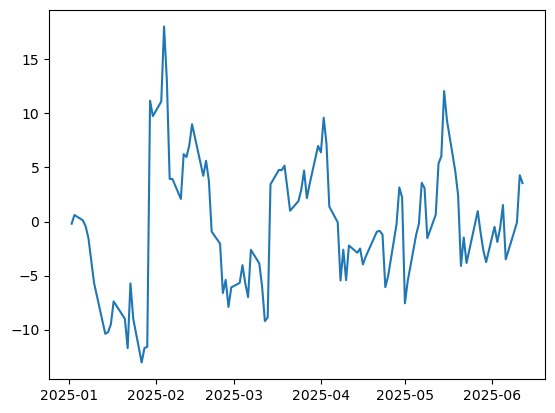

In [12]:
plt.plot(seasonality)

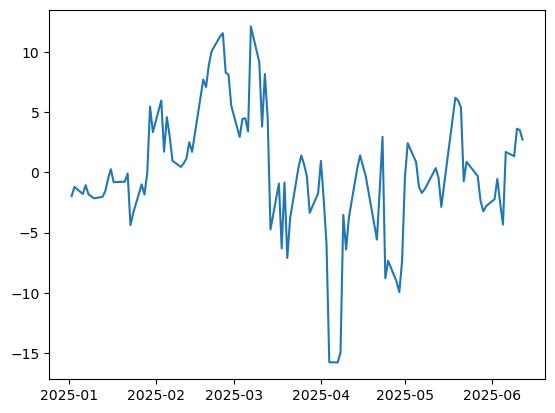

In [13]:
plt.plot(residual)